In [26]:
import os, sys
tag_tracking_path = os.path.abspath(os.path.join('', './../..'))
sys.path.insert(0, tag_tracking_path)

from tagsim.base_im_generation import *
from tagsim.sim_cardiacmotion import *

# Import the tagsim functions
from tagsim.sim_cardiacmotion import get_random_heart
from tagsim.sim_fullmotion import get_full_motion_im

import matplotlib.pyplot as plt

In [27]:
import importlib
import tagsim.sim_cardiacmotion
importlib.reload(tagsim.sim_cardiacmotion)

<module 'tagsim.sim_cardiacmotion' from '/home/hb20/Desktop/PhD/tag_tracking/tagsim/sim_cardiacmotion.py'>

In [28]:
def signaltonoise(a, axis=0, ddof=0):
    """
    The signal-to-noise ratio of the input data.
    Returns the signal-to-noise ratio of `a`, here defined as the mean
    divided by the standard deviation.
    Parameters
    ----------
    a : array_like
        An array_like object containing the sample data.
    axis : int or None, optional
        Axis along which to operate. Default is 0. If None, compute over
        the whole array `a`.
    ddof : int, optional
        Degrees of freedom correction for standard deviation. Default is 0.
    Returns
    -------
    s2n : ndarray
        The mean to standard deviation ratio(s) along `axis`, or 0 where the
        standard deviation is 0.
    """
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

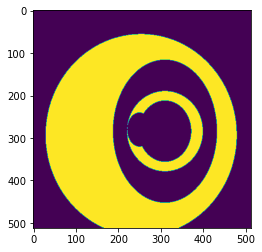

In [31]:
res = make_random_mask()
plt.imshow(res)

In [32]:
res = gen_heart(Np = 10, N_up=100, LV_smooth = .02, NN = 512, Nt = 25, N_im = 256, motion_blur = 1.0)
res['r'].shape

(25, 6597, 3)

In [35]:
ke = 0.1  # DENSE encoding strength
basepath = '../image_db/' # Location of image files for background
use_gpu = False 
max_flip = 30

# Perform the data generation/simulation
res = get_random_heart(max_flip = max_flip, use_gpu = use_gpu, basepath = basepath, mode='DENSE', SNR_range = (4,8))

# Get the final phase cycled images from results
im_dense = res['all_im_pc']

/home/hb20/anaconda3/envs/densesim/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


In [36]:
# Jupyter animation of image
import numpy as np
from torch_track.utils_anim import TagAnimator
from IPython.display import HTML

A = TagAnimator(np.squeeze(np.abs(im_dense)), None)
HTML(A.anim.to_jshtml())

Starting animation class . . . 
Making animation . . . 


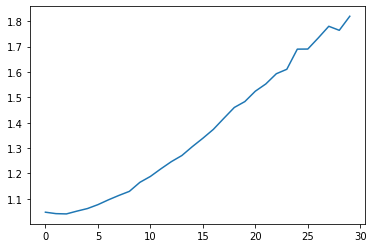

In [53]:
mag_im = np.abs(im_dense)
snrs = []
for t in range(len(mag_im)):
    snrs.append(signaltonoise(mag_im[t], axis=None))
plt.plot(snrs)

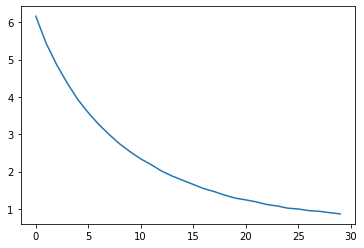

In [43]:
avg_intens = []
for t in range(len(mag_im)):
    avg_intens.append(np.mean(mag_im[t]))
plt.plot(avg_intens)

In [50]:
new_dense = np.zeros(mag_im.shape)
for t in range(len(new_dense)):
    new_dense[t] = mag_im[t]/np.mean(mag_im[t])

In [51]:
A = TagAnimator(new_dense, None)
HTML(A.anim.to_jshtml())

Starting animation class . . . 
Making animation . . . 


In [57]:
np.min(mag_im)

0.0015238507

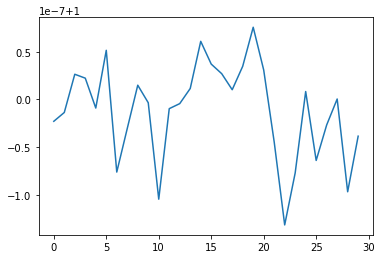

In [55]:
avg_intens = []
for t in range(len(new_dense)):
    avg_intens.append(np.mean(new_dense[t]))
plt.plot(avg_intens)